In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *

In [30]:
K = 10**3
mu1 = 1
mu2 = 1

n11 = 1.5/10
n12 = 4.0/10
n21 = 8.0/10
n22 = 2.0/10

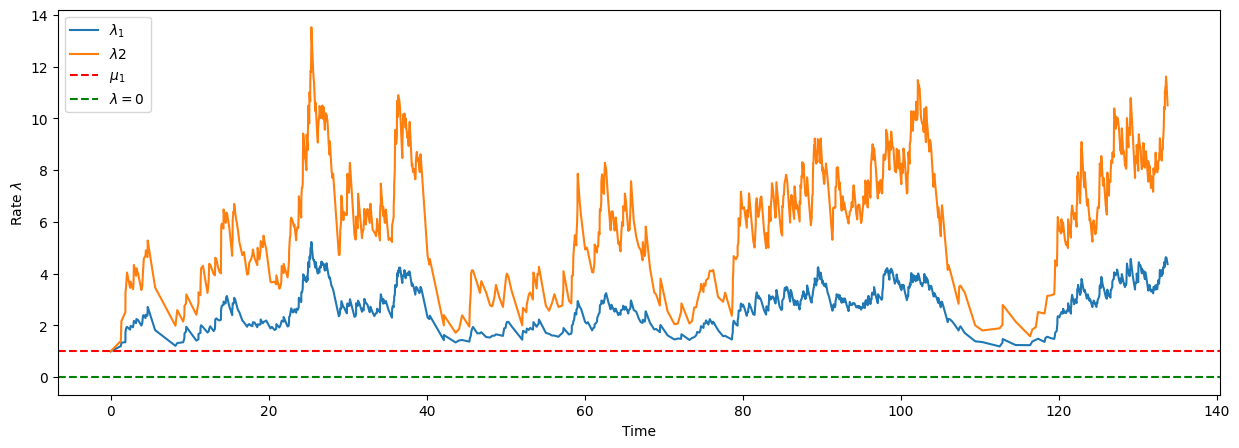

In [31]:
times_between_events, times, rate1, rate2 = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
plt.figure(figsize=(15,5))
plt.plot(times, rate1, label='$\lambda_1$')
plt.plot(times, rate2, label='$\lambda2$')
plt.axhline(y=mu1, color='r', linestyle='--', label='$\mu_1$')
plt.axhline(y=0, color='g', linestyle='--', label='$\lambda=0$')
plt.xlabel('Time')
plt.ylabel('Rate $\lambda$')
plt.legend()

# Percolation plots

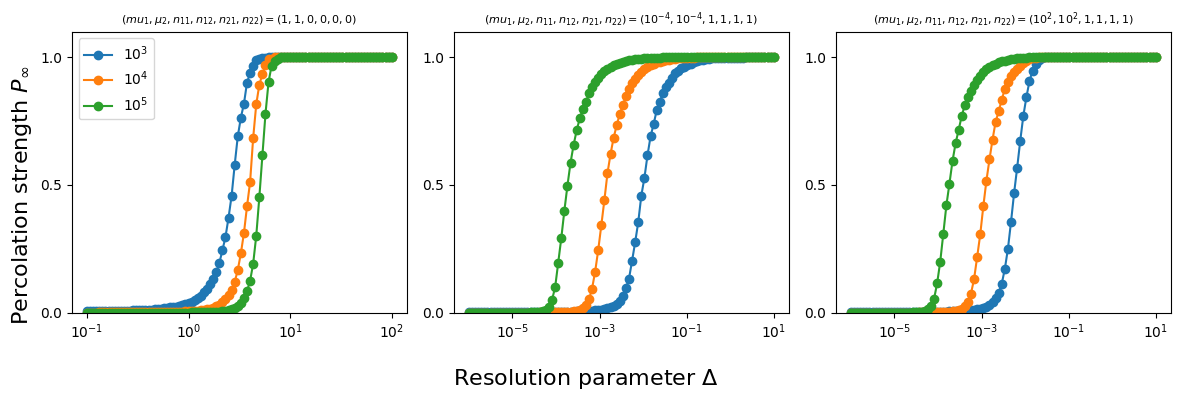

In [40]:
mus1 = [1, 10**-4, 10**2]
mus2 = [1, 10**-4, 10**2]

R = 10**2

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-6, 1, 100), np.logspace(-6, 1, 100)]
ns11 = [0, 1, 1]
ns22 = [0, 1, 1]
ns12 = [0, 1, 1]
ns21 = [0, 1, 1]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)
        percolation_strength = np.mean(percolations, axis=0)
        ax.plot(delta, percolation_strength, marker = 'o')
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.axes[0].set_title('$(\mu_{1}, \mu_{2}, n_{11}, n_{12}, n_{21}, n_{22}) = (1, 1, 0, 0, 0, 0)$', fontsize = 8)
fig.axes[1].set_title('$(\mu_{1}, \mu_{2}, n_{11}, n_{12}, n_{21}, n_{22}) = (10^{-4}, 10^{-4}, 1, 1, 1, 1)$', fontsize = 8)
fig.axes[2].set_title('$(\mu_{1}, \mu_{2}, n_{11}, n_{12}, n_{21}, n_{22}) = (10^{2}, 10^{2}, 1, 1, 1, 1)$', fontsize = 8)
fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()
